In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Different Shapes

1. Cluster

In [2]:
from sklearn.datasets import make_blobs
n_samples = 1000
X1, _ = make_blobs(n_samples=n_samples, n_features= 2, centers=1, cluster_std=1.0, random_state=42)

2. Donut

In [4]:
# Parameters for the donut shape
n_samples = 1000          # Number of points
inner_radius = 2.0        # Inner radius of the donut
outer_radius = 5.0        # Outer radius of the donut

# Generate random angles uniformly between 0 and 2*pi
angles = np.random.uniform(0, 2 * np.pi, n_samples)

# Generate random radii uniformly between inner_radius and outer_radius
radii = np.random.uniform(inner_radius, outer_radius, n_samples)

# Convert polar coordinates to Cartesian coordinates
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# Combine x and y into a 2D array with shape (n_samples, 2)
X2 = np.column_stack((x, y))

3. Moons

In [37]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Parameters
n_samples = 1000

# Generate a moons dataset
Xm, ym = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Filter to only keep the points corresponding to one class (class 0)
X_class_0 = Xm[y == 0]

# Get the labels for class 0 only
y_class_0 = ym[y == 0]

# Combine x and y into a 2D array with shape (n_samples, 2)
X3 = np.column_stack((X_class_0, y_class_0))

In [48]:
n_samples = 2000
x = np.linspace(0, 4 * np.pi, n_samples)
y = np.sin(x) * 3 + np.random.normal(scale=0.1, size=x.shape)

thickness_noise = np.random.normal(scale=0.7, size=x.shape)

X4 = np.vstack((x + thickness_noise, y)).T

# Euclidian Distance

In [50]:
import numpy as np

def Euclidean(x, p):
    n_samples = x.shape[0]
    distances = np.zeros(n_samples)

    for i in range(n_samples):
        dist_list = []
        for j in range(n_samples):
            if i != j:
                dist = np.linalg.norm(x[i] - x[j], ord=p)  # Euclidean distance (L2 norm if p=2)
                dist_list.append(dist)

        # Calculate the average distance to all other points
        distances[i] = sum(dist_list) / (n_samples - 1)  # Exclude the distance to itself

    return distances

cluster = Euclidean(X1, 2)
donut = Euclidean(X2, 2)
moon = Euclidean(X3, 2)
sine = Euclidean(X4, 2)

# Plotting of Graphs

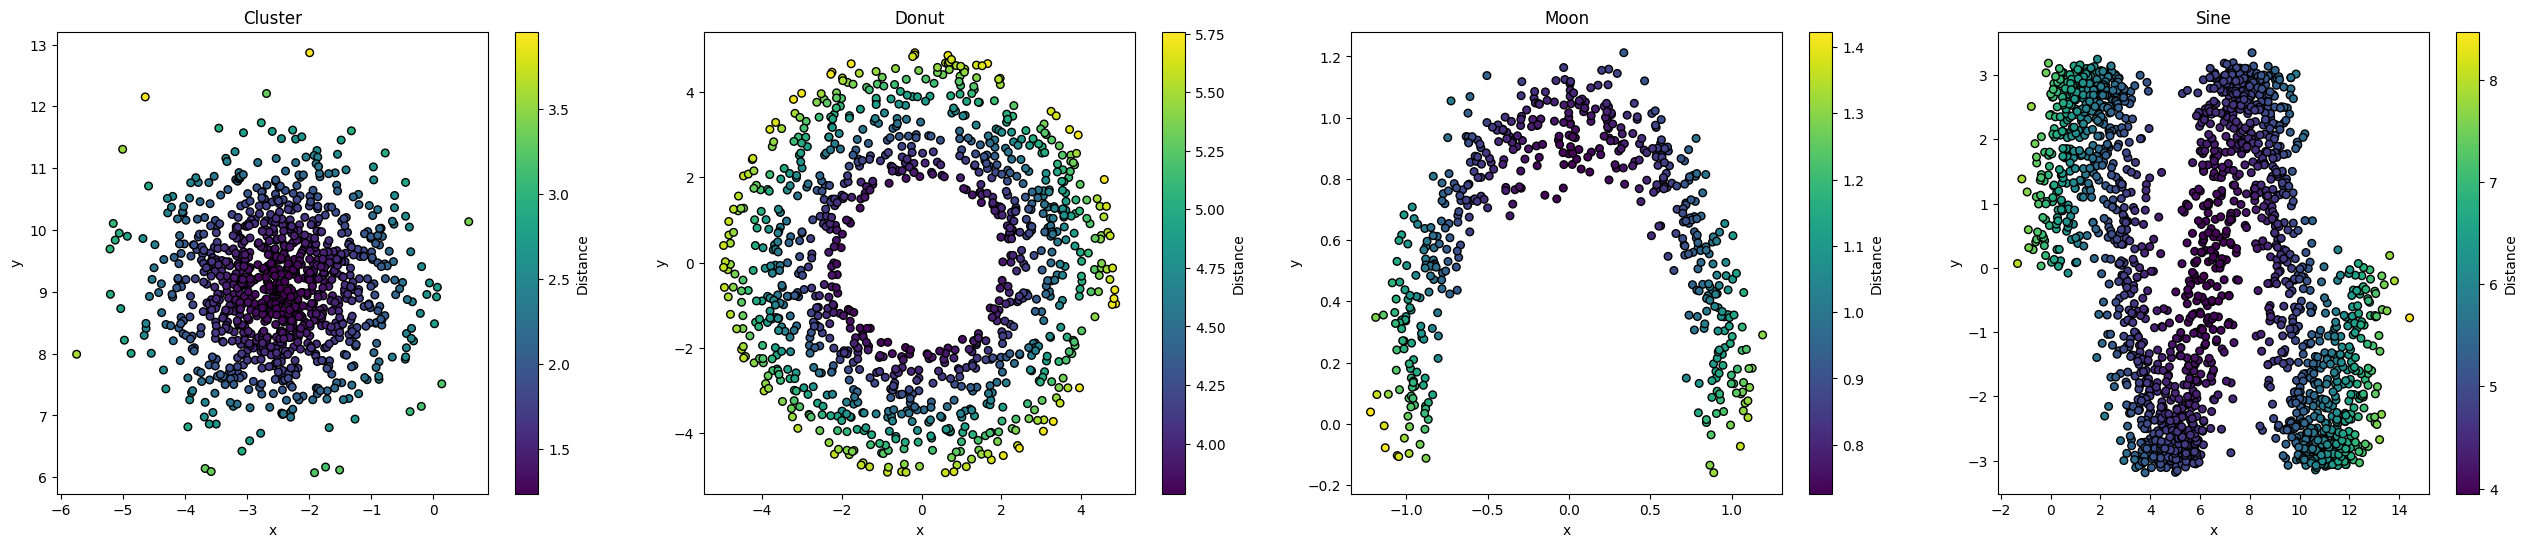

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(32, 6))

# Plot 1
scatter = axs[0].scatter(X1[:, 0], X1[:, 1], c= cluster, cmap='viridis', s=30, edgecolor='k')
axs[0].set_title('Cluster')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.colorbar(scatter, ax=axs[0], label='Distance')


# Plot 2
scatter = axs[1].scatter(X2[:, 0], X2[:, 1], c= donut, cmap='viridis', s=30, edgecolor='k')
axs[1].set_title('Donut')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
fig.colorbar(scatter, ax=axs[1], label='Distance')

# Plot 3
scatter = axs[2].scatter(X3[:, 0], X3[:, 1], c= moon, cmap='viridis', s=30, edgecolor='k')
axs[2].set_title('Moon')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
fig.colorbar(scatter, ax=axs[2], label='Distance')

# Plot 4
scatter = axs[3].scatter(X4[:, 0], X4[:, 1], c= sine, cmap='viridis', s=30, edgecolor='k')
axs[3].set_title('Sine')
axs[3].set_xlabel('x')
axs[3].set_ylabel('y')
fig.colorbar(scatter, ax=axs[3], label='Distance')
